In the current age where Data Science / AI is booming, it is important to understand how Machine Learning is used in the industry to solve complex business problems. In order to select which Machine Learning model should be used in production, a selection metric is chosen upon which different machine learning models are scored.

One of the most commonly used metrics nowadays is AUC-ROC (Area Under Curve - Receiver Operating Characteristics) curve. ROC curves are pretty easy to understand and evaluate once there is a good understanding of confusion matrix and different kinds of errors.

Introduction to confusion matrix and different statistic computed on it

Definitions of TP, FN, TN, FP

Type 1 and Type 2 errors
Statistics computed from Recall, Precision, F-Score

Introduction to AUC ROC Curve

Different scenarios with ROC Curve and Model Selection

Example of ROC Curve with Python

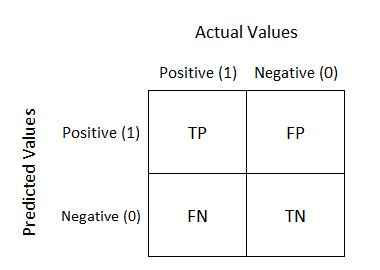

The class labeled 1 is the positive class in our example. The class labeled as 0 is the negative class here. As we can see, the Positive and Negative Actual Values are represented as columns, while the Predicted Values are shown as the rows.

TP = True Positive – The model predicted the positive class correctly, to be a positive class.

FP = False Positive – The model predicted the negative class incorrectly, to be a positive class.

FN = False Negative – The model predicted the positive class incorrectly, to be the negative class.

TN = True Negative – The model predicted the negative class correctly, to be the negative class.

Type 1 Error: The model predicted the instance to be a Positive class, but it is incorrect. This is False Positive (FP).

Type 2 Error: The model predicted the instance to be the Negative class, but is it incorrect. This is False Negative (FN).

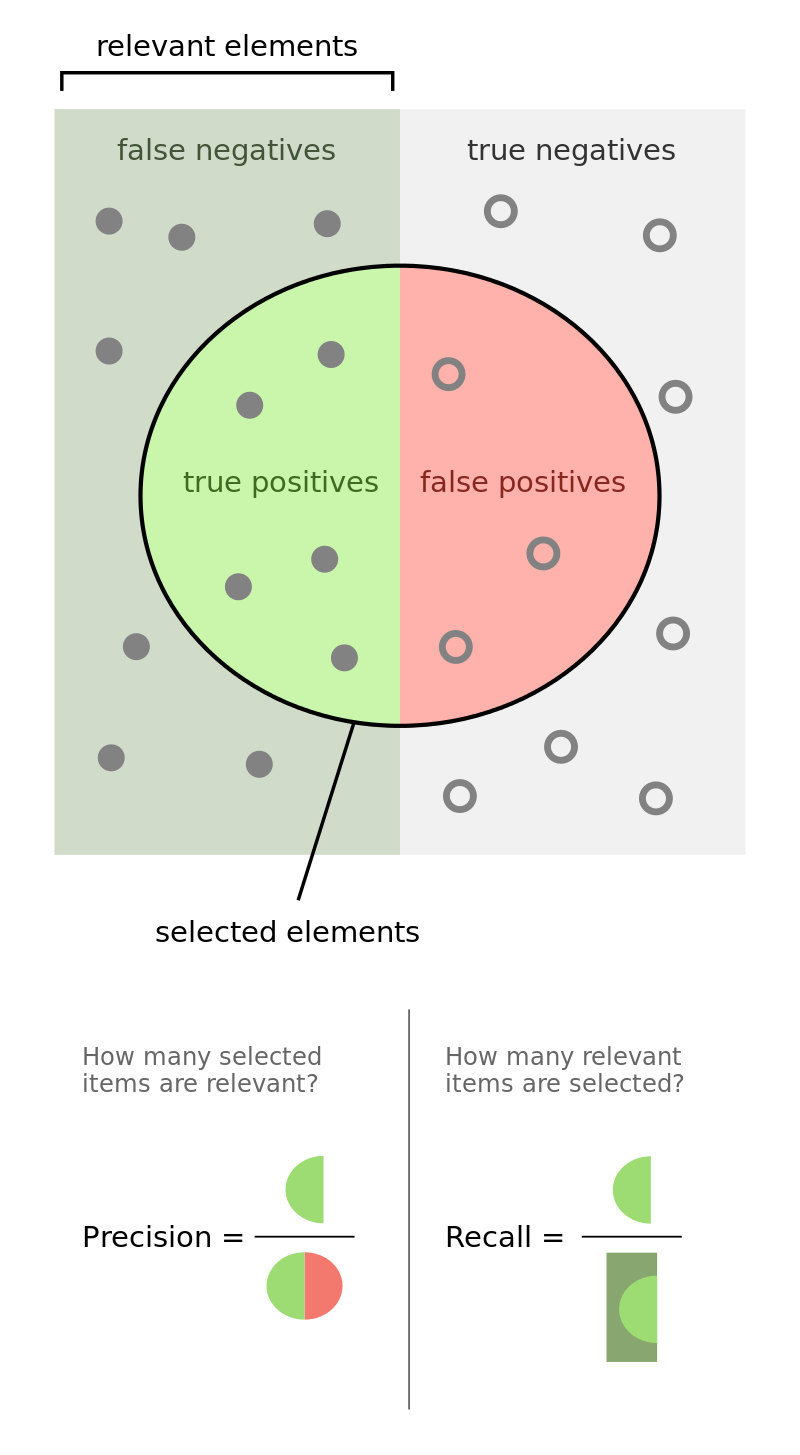


Source: https://commons.wikimedia.org/wiki/File:Precisionrecall.svg

Recall: Out of all the positive classes, how many instances were identified correctly.

Recall = TP / (TP + FN)

Precision: Out of all the predicted positive instances, how many were predicted correctly.

Precision = TP / (TP + FP)

F-Score: From Precision and Recall, F-Measure is computed and used as metrics sometimes. F – Measure is nothing but the harmonic mean of Precision and Recall.

F-Score = (2 * Recall * Precision) / (Recall + Precision)


AUC–ROC curve is the model selection metric for bi–multi class classification problem. ROC is a probability curve for different classes. ROC tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.

A typical ROC curve has False Positive Rate (FPR) on the X-axis and True Positive Rate (TPR) on the Y-axis.

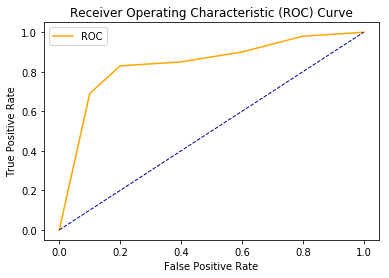

The area covered by the curve is the area between the orange line (ROC) and the axis. This area covered is AUC. The bigger the area covered, the better the machine learning models is at distinguishing the given classes. Ideal value for AUC is 1.

Different Scenarios with ROC Curve and Model Selection

Scenario #1 (Best Case Scenario)

For any classification model, the best scenario is when there is a clear distinction between the two / all the classes.

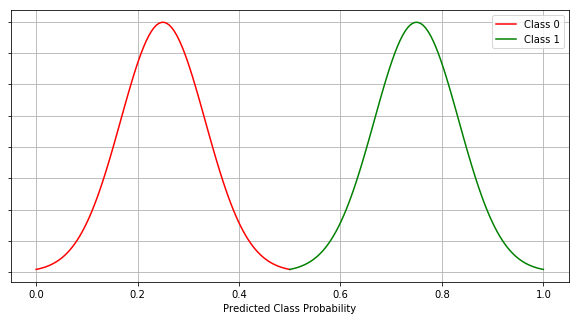

The graph above shows the Predicted Class Probability for both classes 0 and 1. The threshold is 0.5 which means, if the predicted probability of the class for an instance is less than 0.5, that instance is predicted to be an instance of class 0. If the probability of the class for an instance is equal or greater than 0.5, the instance is classified as the instance of class 1.

The AUC-ROC curve for this case is as below.

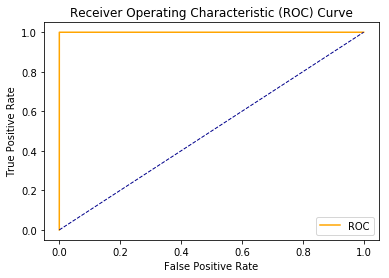

As we can see here, we have a clear distinction between the two classes as a result, we have the AUC of 1. The maximum area between ROC curve and base line is achieved here.


Scenario #2 (Random Guess)

In the event where both the class distribution simply mimic each other, AUC is 0.5. In other words, our model is 50% accurate for instances and their classification. The model has no discrimination capabilities at all in this case.

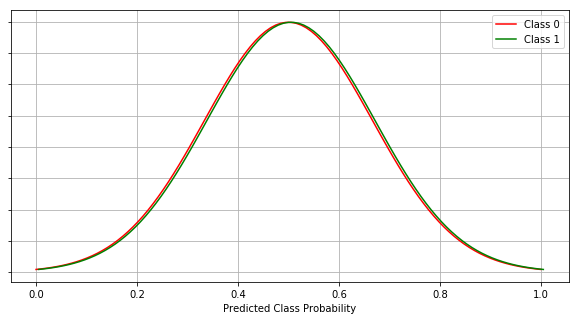

We can see there is no clear discrimination between the two classes.

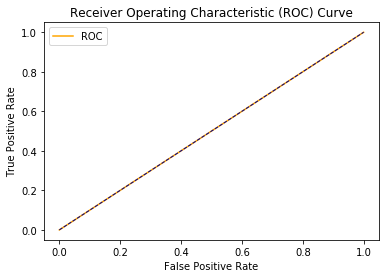

It is evident from the ROC AUC curve diagram, that the area between ROC and the axis is 0.5. This is still not the worst model but it makes a random guess, much like a human would do.

Scenario #3 (Worst Case Scenario)

If the model completely misclassifies the classes, it is the worst case.

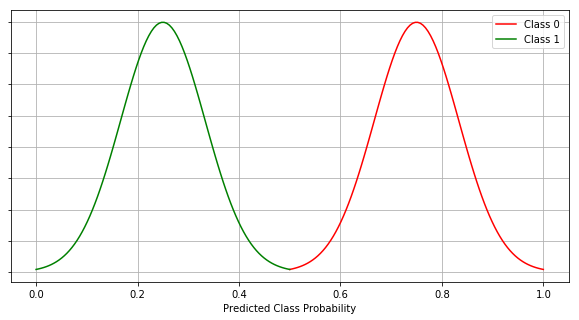

Completely opposite of the best case scenario (scenario #1), in this case, all the instances of class 1 are misclassified as class 0 and all the instances of class 0 are misclassified as class 1.

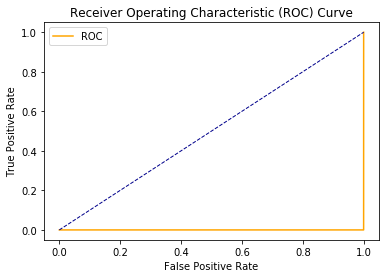

As a result, we get AUC to be 0, which the worst case scenario.

Scenario #4 (Industry / Norm Scenario)

In a usual industry scenario, best cases are never observed. We never get a clear distinction between the two classes.

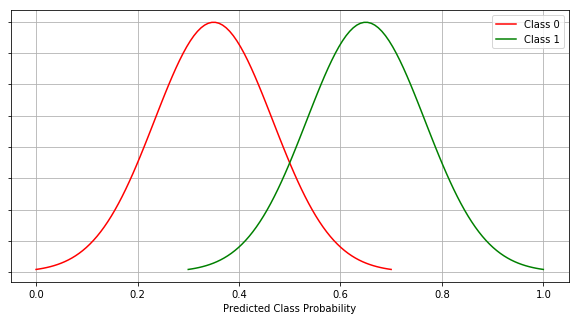

In this case, as observed, we have some overlapping and that introduces Type 1 and Type 2 errors to the model prediction. In this case we get AUC to be somewhere between 0.5 and 1.



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [12]:
# Defining a python function to plot the ROC curves.

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [13]:
# Generate sample data.

data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

In [14]:
# Split the data into train and test sub-datasets.

trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)

In [15]:
# Fit a model on the train data.

model = RandomForestClassifier()
model.fit(trainX, trainy)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
# Predict probabilities for the test data.

probs = model.predict_proba(testX)

In [17]:
# Keep Probabilities of the positive class only.

probs = probs[:, 1]

In [18]:
# Compute the AUC Score.

auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)

AUC: 0.96


In [19]:
# Get the ROC Curve.

fpr, tpr, thresholds = roc_curve(testy, probs)

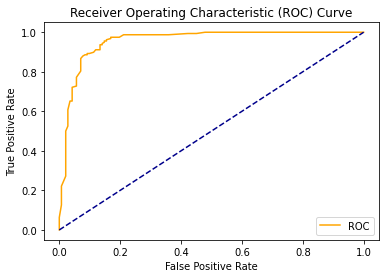

In [20]:
# Plot ROC Curve using our defined function

plot_roc_curve(fpr, tpr)

AUC-ROC curve is one of the most commonly used metrics to evaluate the performance of machine learning algorithms particularly in the cases where we have imbalanced datasets. 